In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
net = pd.read_csv("netflix_titles.csv")

In [3]:
net.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
net.shape

(8807, 12)

In [5]:
net.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
net.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Data cleaning

In [7]:
net['date_added'] = pd.to_datetime(net['date_added'])

In [8]:
net['month']=net['date_added'].dt.month

In [9]:
net['month']= net['month'].astype('Int64')

In [10]:
net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9


In [11]:
net[net['title'].duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
5964,s5965,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",3
5965,s5966,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",2018-10-10,2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ...",10
5966,s5967,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",3


In [12]:
net.drop_duplicates('title',inplace=True)
net=net.reset_index(drop=True)

In [13]:
net.shape

(8804, 13)

In [14]:
net.isnull().sum()

show_id            0
type               0
title              0
director        2633
cast             825
country          829
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
month             10
dtype: int64

In [15]:
net['cast'].fillna('Not available',inplace=True)

In [16]:
net['rating'].fillna('NR',inplace=True)

In [17]:
net[net['rating'].str.endswith('min',na=False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",4
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,9
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,8


In [18]:
values={5541:'74 min',5794:'84 min',5813:'66 min'}
net['duration'].fillna(values,axis=0,inplace=True)

In [19]:
net['rating']=net['rating'].str.replace('...min$','NR',regex=True)

## EDA

### 1. Rating Classification

In [20]:
net['rating'].value_counts()

TV-MA       3207
TV-14       2158
TV-PG        863
R            798
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            87
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

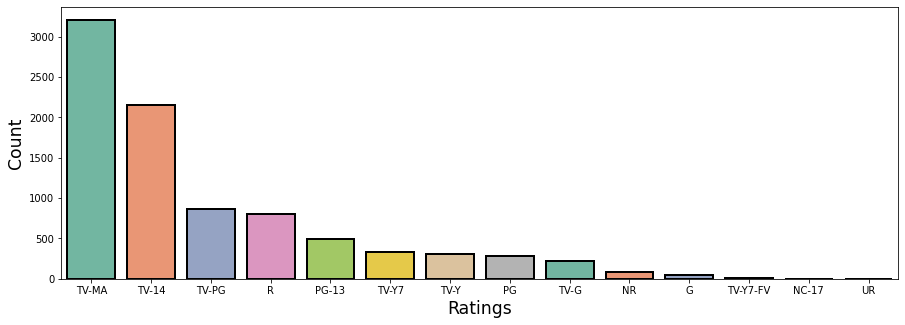

In [21]:
plt.figure(figsize=(15,5))
sn.countplot(x='rating',data=net,palette="Set2",ec='black',linewidth=2,order=net['rating'].value_counts().index)
plt.xlabel("Ratings",fontsize='xx-large')
plt.ylabel("Count",fontsize='xx-large')
plt.show()

### TV-MA is usually assigned to those movies which are to be viewed by adults of age 18 and up.

### 2. Movies/tv shows Yearwise 

In [22]:
mov_tv= net['release_year'].value_counts()
mov_tv

2018    1145
2017    1032
2019    1029
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

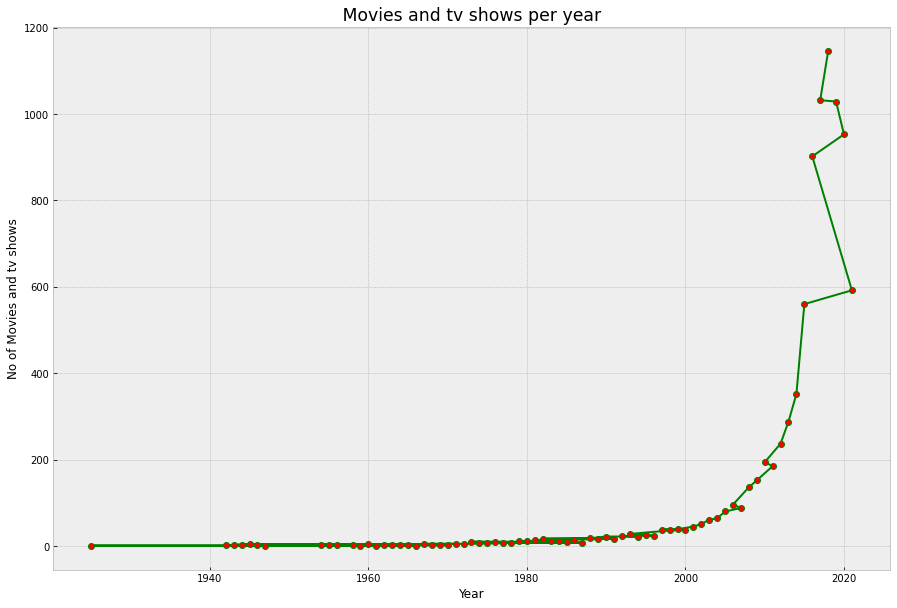

In [23]:
plt.figure(figsize=(15,10))
plt.style.use('bmh')
plt.plot(mov_tv.index,mov_tv,'go-',linewidth=2,markerfacecolor='red')
plt.xlabel('Year')
plt.ylabel('No of Movies and tv shows')
plt.title(' Movies and tv shows per year ',loc='center',fontsize='xx-large')
plt.show()

### Highest in 2018.

### 3. Type Contribution

In [24]:
net.type.value_counts()

Movie      6129
TV Show    2675
Name: type, dtype: int64

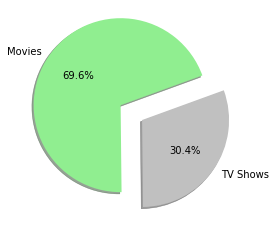

In [25]:
plt.pie(net.type.value_counts(),labels=["Movies","TV Shows"],shadow=True,explode=[0.2,0.1],colors=['lightgreen','silver'],autopct='%1.1f%%',startangle=20)
plt.show()

### 4. Last 2 decades 

In [26]:
sort_year=net['release_year'].value_counts().index[:21].sort_values(ascending=False)

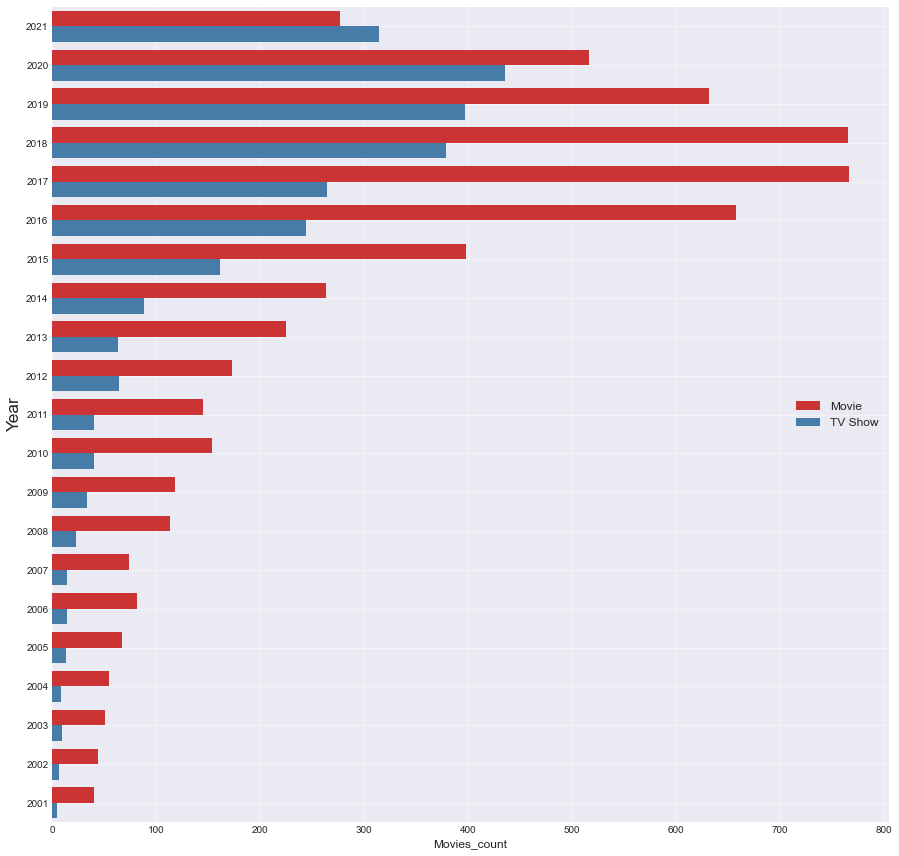

In [27]:
plt.figure(figsize=(15,15))
plt.style.use('seaborn-dark')
sn.countplot(y='release_year',hue='type',data=net,order=sort_year, palette="Set1")
plt.legend(loc='center right',fontsize='large')
plt.grid()
plt.xlabel('Movies_count',fontsize='large')
plt.ylabel('Year',fontsize='xx-large')
plt.show()

In [28]:
mx=net['release_year'].max()
print("Maximum Year:",mx)
m=net['release_year'].min()
print('Minimum Year:',m)
print("Span:",mx-m)

Maximum Year: 2021
Minimum Year: 1925
Span: 96


In [29]:
net['release_year'].value_counts().count()

74

### Netflix contains movies and tv shows of past 74 years

### 5. Oldest tv and movie available

In [30]:
net.loc[net['release_year']==net['release_year'].min(),['type','title','rating','duration','description']]

,type,title,rating,duration,description
4250,TV Show,Pioneers: First Women Filmmakers*,TV-14,1 Season,This collection restores films from women who ...


In [31]:
net.loc[net['type']=='Movie',['title','release_year']].sort_values(by='release_year',ascending=True)[:10].set_index('title')

,release_year
title,
Prelude to War,1942
The Battle of Midway,1942
Undercover: How to Operate Behind Enemy Lines,1943
WWII: Report from the Aleutians,1943
Why We Fight: The Battle of Russia,1943
Tunisian Victory,1944
The Memphis Belle: A Story of a\nFlying Fortress,1944
The Negro Soldier,1944
Nazi Concentration Camps,1945


### Pioneers: First Women Filmmakers is the oldest tv show and Prelude to war is the oldest movie available on netflix.
 

### 6. In which month of the year more movies are added into netflix?

In [35]:
mon= net['month'].value_counts()

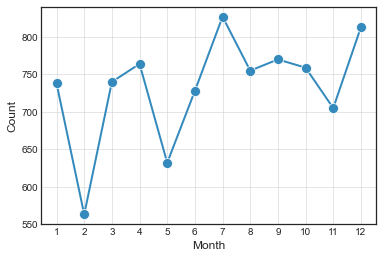

In [42]:
sn.lineplot(x=mon.index,y=mon,marker='o',markersize=10)
plt.xlabel('Month',fontsize='large')
plt.ylabel('Count',fontsize='large')
plt.grid()
plt.xticks(range(1,13))
plt.show()

### 7. Names of the directors who have more than 10 of their directed movies in the netflix database

In [37]:
dirlist=net.director.str.split(', ',expand=True).stack()
pre=dirlist.value_counts()[:11]

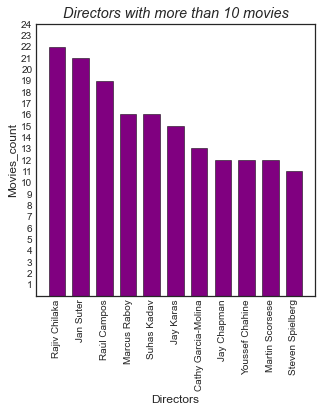

In [39]:
plt.figure(figsize=(5,5))
plt.bar(pre.index,pre,0.7,color='purple',ec='black')
plt.style.use('seaborn-white')
plt.title('Directors with more than 10 movies',fontstyle='italic')
plt.xlabel('Directors',fontsize='large')
plt.xticks(rotation='vertical',fontsize=10)
plt.yticks(range(1,25))
plt.ylabel('Movies_count',fontsize='large')
plt.show()

### 8. Top 10 countries where the movies / shows were produced.

In [40]:
countries=net['country'].str.split(",",expand=True).stack().sort_values(ascending=False)
final=countries.str.lstrip().value_counts().head(10)

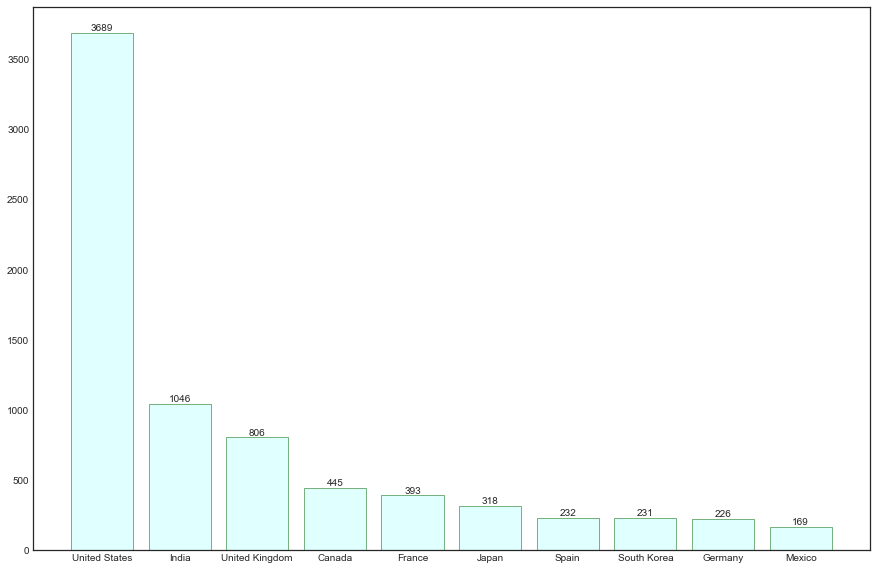

In [41]:
plt.figure(figsize=(15,10))
plt.bar(final.index,final,0.8,color='lightcyan',ec='darkgreen')
for i in range(0,10):
    plt.text(final.index[i],final[final.index[i]],final[final.index[i]],ha='center',va='bottom')
plt.show()